In [1]:
import numpy as np
import os
import shutil
import time
import pandas as pd
from os.path import join
from PIL import Image,ImageOps
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

from keras.applications.vgg16 import VGG16

from keras.preprocessing.image import load_img,img_to_array,array_to_img,ImageDataGenerator
from keras.optimizers import SGD
from keras import optimizers

from keras.models import Sequential,Model, load_model

from keras.layers import Input, Activation, Flatten, Dense, Flatten,Conv2D, Dropout, MaxPool2D, GlobalAveragePooling2D


from keras.callbacks.callbacks import ModelCheckpoint,EarlyStopping

from keras.utils import np_utils

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

### Load EDS Dataset

In [4]:
X_EDS_0221=np.load('22092_EDS_Dataset4.npy')

### Generate Young's modulus Dataset

In [5]:
E_22092_0221=[20.37,20.94,22.42,25.39,15.20,17.30,17.20,19.26,15.88,23.10]
Y_EDS_0221=[]
for i in range(10):
    Y_EDS_0221.extend([E_22092_0221[i]]*80)
    
Y_EDS_0221=pd.DataFrame(Y_EDS_0221)

In [21]:
X_EDS_0221,Y_EDS_0221=shuffle(X_EDS_0221,Y_EDS_0221)
X_EDS_train,X_EDS_test,Y_EDS_train,Y_EDS_test=train_test_split(X_EDS_0221,Y_EDS_0221,test_size=0.25,random_state=53)

### Define CNN model

In [18]:
def vgg16_mod_3(lr = 0.00001):
    model=Sequential()
    
    model.add(Conv2D(input_shape=(112,112,9),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=100,activation="relu"))
    model.add(Dense(units=100,activation="relu"))
    model.add(Dense(units=100,activation="relu"))
    model.add(Dense(units=1, activation="linear"))
    
    
    sgd = optimizers.SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=True)
    
    model.compile(optimizer=sgd,loss="mean_absolute_percentage_error")
    return model

### Train Model

In [31]:
model_lr_7 = vgg16_mod_3(lr=1e-7)

In [32]:
checkpoint = ModelCheckpoint("vgg16_eds_10292021_lr_7.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=1, mode='auto')

In [33]:
eds_history_10292021_lr_7 = model_lr_7.fit(X_EDS_train,Y_EDS_train,validation_data=(X_EDS_test,Y_EDS_test),epochs=200, batch_size=16,callbacks=[checkpoint,early])

Train on 600 samples, validate on 200 samples
Epoch 1/200
600/600 [==============================] - 55s 92ms/step - loss: 98.1414 - val_loss: 97.5472

Epoch 00001: val_loss improved from inf to 97.54716, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 2/200
600/600 [==============================] - 54s 89ms/step - loss: 96.9222 - val_loss: 96.2962

Epoch 00002: val_loss improved from 97.54716 to 96.29616, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 3/200
600/600 [==============================] - 53s 89ms/step - loss: 95.7458 - val_loss: 95.2208

Epoch 00003: val_loss improved from 96.29616 to 95.22081, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 4/200
600/600 [==============================] - 55s 91ms/step - loss: 94.7002 - val_loss: 94.1920

Epoch 00004: val_loss improved from 95.22081 to 94.19196, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 5/200
600/600 [==============================] - 56s 93ms/step - loss: 93.6504 - val_loss: 93.1141

Epoch 00005: val_loss imp

Epoch 42/200
600/600 [==============================] - 53s 88ms/step - loss: 11.4478 - val_loss: 11.6742

Epoch 00042: val_loss improved from 11.74112 to 11.67415, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 43/200
600/600 [==============================] - 53s 89ms/step - loss: 11.4277 - val_loss: 11.6232

Epoch 00043: val_loss improved from 11.67415 to 11.62321, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 44/200
600/600 [==============================] - 55s 92ms/step - loss: 11.3802 - val_loss: 11.5936

Epoch 00044: val_loss improved from 11.62321 to 11.59365, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 45/200
600/600 [==============================] - 54s 90ms/step - loss: 11.3489 - val_loss: 11.6065

Epoch 00045: val_loss did not improve from 11.59365
Epoch 46/200
600/600 [==============================] - 53s 88ms/step - loss: 11.2945 - val_loss: 11.5492

Epoch 00046: val_loss improved from 11.59365 to 11.54922, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 47/

Epoch 83/200
600/600 [==============================] - 54s 90ms/step - loss: 10.2400 - val_loss: 10.6525

Epoch 00083: val_loss improved from 10.65825 to 10.65255, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 84/200
600/600 [==============================] - 54s 90ms/step - loss: 10.1849 - val_loss: 10.6158

Epoch 00084: val_loss improved from 10.65255 to 10.61582, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 85/200
600/600 [==============================] - 53s 88ms/step - loss: 10.1811 - val_loss: 10.6018

Epoch 00085: val_loss improved from 10.61582 to 10.60180, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 86/200
600/600 [==============================] - 55s 91ms/step - loss: 10.1279 - val_loss: 10.5970

Epoch 00086: val_loss improved from 10.60180 to 10.59702, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 87/200
600/600 [==============================] - 53s 89ms/step - loss: 10.1757 - val_loss: 10.5885

Epoch 00087: val_loss improved from 10.59702 to 10.58848, sav

Epoch 124/200
600/600 [==============================] - 59s 99ms/step - loss: 9.3625 - val_loss: 9.8608

Epoch 00124: val_loss did not improve from 9.84240
Epoch 125/200
600/600 [==============================] - 55s 92ms/step - loss: 9.4200 - val_loss: 9.8411

Epoch 00125: val_loss improved from 9.84240 to 9.84107, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 126/200
600/600 [==============================] - 55s 91ms/step - loss: 9.3459 - val_loss: 9.7939

Epoch 00126: val_loss improved from 9.84107 to 9.79390, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 127/200
600/600 [==============================] - 54s 90ms/step - loss: 9.3091 - val_loss: 9.7778

Epoch 00127: val_loss improved from 9.79390 to 9.77776, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 128/200
600/600 [==============================] - 53s 88ms/step - loss: 9.3250 - val_loss: 9.8171

Epoch 00128: val_loss did not improve from 9.77776
Epoch 129/200
600/600 [==============================] - 56s 93ms/step 

600/600 [==============================] - 61s 102ms/step - loss: 8.7877 - val_loss: 9.3022

Epoch 00166: val_loss improved from 9.31776 to 9.30224, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 167/200
600/600 [==============================] - 62s 103ms/step - loss: 8.7283 - val_loss: 9.2897

Epoch 00167: val_loss improved from 9.30224 to 9.28968, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 168/200
600/600 [==============================] - 61s 102ms/step - loss: 8.7585 - val_loss: 9.3013

Epoch 00168: val_loss did not improve from 9.28968
Epoch 169/200
600/600 [==============================] - 62s 103ms/step - loss: 8.7341 - val_loss: 9.2549

Epoch 00169: val_loss improved from 9.28968 to 9.25489, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 170/200
600/600 [==============================] - 60s 101ms/step - loss: 8.7604 - val_loss: 9.2450

Epoch 00170: val_loss improved from 9.25489 to 9.24496, saving model to vgg16_eds_10292021_lr_7.h5
Epoch 171/200
600/600 [=========

In [34]:
model_lr_7.save("vgg16_modelfile_10292021_10sample_epo200_batch16.h5")
model_lr_7.save_weights('vgg16_weightsfile_10292021_10sample_epo200_batch16.h5')

In [35]:
eds_history_10292021_df = pd.DataFrame(eds_history_10292021_lr_7.history) 
eds_history_10292021_df.to_excel('saved_training_histroy_10292021.xlsx')

### Predict

In [36]:
pred_10292021 = model_lr_7.predict(X_EDS_test)

Text(0.5, 0, "Ground truth Young's modulus \nfrom indenation experiments, GPa")

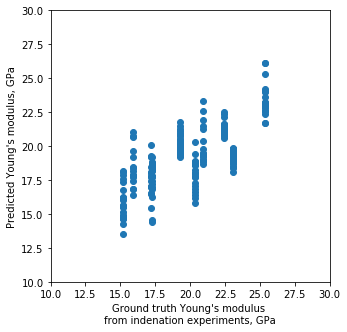

In [37]:
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(Y_EDS_test,pred_10292021)
ax.set_xlim([10,30])
ax.set_ylim([10,30])
ax.set_ylabel("Predicted Young's modulus, GPa")
ax.set_xlabel("Ground truth Young's modulus \nfrom indenation experiments, GPa")